<a href="https://colab.research.google.com/github/LCaravaggio/politext/blob/main/Wordclouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
from collections import Counter
import ast

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Leo la base
base=pd.read_csv('/content/drive/MyDrive/psoe_pp.csv')

In [77]:
# Por ejemplo, antes de la eliminación, las frases pronunciadas en el discurso 11 son: 
base.bigramas[11]

"[('señoría', 'resultado'), ('resultado', 'siguient'), ('siguient', 'voto'), ('voto', 'favor'), ('favor', 'don'), ('don', 'jaim'), ('jaim', 'javier'), ('javier', 'barrero'), ('barrero', 'lópez'), ('lópez', 'favor'), ('favor', 'don'), ('don', 'josé'), ('josé', 'ramón'), ('ramón', 'beloki'), ('beloki', 'guerra'), ('guerra', 'favor'), ('favor', 'don'), ('don', 'ignacio'), ('ignacio', 'gil'), ('gil', 'lázaro'), ('lázaro', 'favor'), ('favor', 'doña'), ('doña', 'celia'), ('celia', 'villalobo'), ('villalobo', 'talero'), ('talero', 'siet'), ('siet', 'voto'), ('voto', 'blanco'), ('blanco', 'tre'), ('tre', 'voto'), ('voto', 'nulo'), ('nulo', 'consecuencia'), ('consecuencia', 'quedan'), ('quedan', 'proclamado'), ('proclamado', 'secretario'), ('secretario', 'primero'), ('primero', 'don'), ('don', 'jaim'), ('jaim', 'javier'), ('javier', 'barrero'), ('barrero', 'lópez'), ('lópez', 'secretario'), ('secretario', 'segundo'), ('segundo', 'don'), ('don', 'josé'), ('josé', 'ramón'), ('ramón', 'beloki'), (

In [14]:
# La frase ('nuevo', 'sistema') aparece en un discurso
for x in range(0,99): 
    if ('nuevo', 'sistema') in ast.literal_eval(base.bigramas[x]):
        print(base['orador.y'][x])

RODRÍGUEZ ZAPATERO


In [15]:
# Todos los bigramas del discurso 0
for bi in ast.literal_eval(base['bigramas'][0]):
    print(bi)

('artículo', 'real')
('real', 'decreto')
('decreto', 'enero')
('enero', 'disolución')
('disolución', 'congreso')
('congreso', 'diputado')
('diputado', 'senado')
('senado', 'convocatoria')
('convocatoria', 'eleccion')
('eleccion', 'celebrada')
('celebrada', 'eleccion')
('eleccion', 'convocada')
('convocada', 'real')
('real', 'decreto')
('decreto', 'cámara')
('cámara', 'resultant')
('resultant', 'reunirán')
('reunirán', 'sesion')
('sesion', 'constitutiva')
('constitutiva', 'abril')
('abril', 'diez')
('diez', 'hora')
('hora', 'dado')
('dado', 'madrid')
('madrid', 'enero')
('enero', 'juan')
('juan', 'carlo')
('carlo', 'rey')
('rey', 'president')
('president', 'gobierno')
('gobierno', 'josé')
('josé', 'lui')
('lui', 'rodríguez')
('rodríguez', 'zapatero')
('zapatero', 'aburto')
('aburto', 'baselga')
('baselga', 'Mª')
('Mª', 'rosario')
('rosario', 'fátima')
('fátima', 'aceb')
('aceb', 'paniagua')
('paniagua', 'ángel')
('ángel', 'jesú')
('jesú', 'agirretxea')
('agirretxea', 'urresti')
('urrest

In [22]:
# Creo un listado con todos los bigramas de la base
bigramas_total=[]
for ind in base.index:
    bigramas_total+=ast.literal_eval(base['bigramas'][ind])

In [24]:
# 200 bigramas más frecuentes
c = Counter(bigramas_total)
list(pd.DataFrame(c.most_common(200))[0])

In [90]:
len(base)

73707

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

base['bigramas']=base['bigramas'].apply(lambda x: "".join(x) )

In [95]:
cv=CountVectorizer(ngram_range=[2,2])

In [98]:
print(cv.fit_transform(base['tokens']))

  (0, 159579)	1
  (0, 1784506)	2
  (0, 560849)	1
  (0, 772967)	1
  (0, 679728)	1
  (0, 400184)	1
  (0, 666632)	1
  (0, 1944300)	1
  (0, 460513)	1
  (0, 735628)	1
  (0, 299559)	1
  (0, 735678)	1
  (0, 460006)	1
  (0, 560694)	1
  (0, 525880)	1
  (0, 1885417)	1
  (0, 1891268)	1
  (0, 1960540)	1
  (0, 428432)	1
  (0, 5520)	1
  (0, 649886)	1
  (0, 1064298)	1
  (0, 531715)	1
  (0, 1283828)	1
  (0, 773124)	1
  :	:
  (73706, 709988)	1
  (73706, 856100)	1
  (73706, 1739291)	1
  (73706, 1426062)	1
  (73706, 1073925)	1
  (73706, 837935)	1
  (73706, 963647)	1
  (73706, 168573)	1
  (73706, 584139)	1
  (73706, 1422328)	1
  (73706, 1713492)	1
  (73706, 561434)	1
  (73706, 1760980)	1
  (73706, 453252)	1
  (73706, 1583912)	1
  (73706, 361539)	1
  (73706, 2077884)	1
  (73706, 314287)	1
  (73706, 214462)	1
  (73706, 1560976)	1
  (73706, 1887751)	1
  (73706, 1226865)	1
  (73706, 1900755)	1
  (73706, 1420327)	1
  (73706, 2127489)	1


In [99]:
len(cv.get_feature_names_out())

2270458

In [101]:
cv.get_feature_names_out()[100]

'abajo presa'

In [102]:
base.head(2)

,Unnamed: 0,Unnamed: 0.1,orden,name.x,intervention,fecha,legislatura,pleno,cataluna,estatut,...,role,name.y,party,province,congreso,senado,total,orador.y,tokens,bigramas
0,0,0,REAL DECRETO DE CONVOCATORIA DE ELECCIONES.,SECRETARIA DE LA MESA DE EDAD (Muñoz Resta),"Artículo 5.º del Real Decreto 33/2008, de 14 d...",01/04/2008,IX,1,0,0,...,SECRETARIA DE LA MESA DE EDAD,"Muñoz Resta, Miriam",PSOE,Baleares,"2 (VIII, IX)",–,2.0,MUÑOZ RESTA,"['artículo', 'real', 'decreto', 'enero', 'diso...","[('artículo', 'real'), ('real', 'decreto'), ('..."
1,1,1,RECURSOS CONTENCIOSO-ELECTORALES INTERPUESTOS.,SECRETARIA DE LA MESA DE EDAD (Muñoz Resta),El señor presidente de la Junta Electoral Cent...,01/04/2008,IX,1,0,0,...,SECRETARIA DE LA MESA DE EDAD,"Muñoz Resta, Miriam",PSOE,Baleares,"2 (VIII, IX)",–,2.0,MUÑOZ RESTA,"['señor', 'president', 'junta', 'elector', 'ce...","[('señor', 'president'), ('president', 'junta'..."


In [119]:
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt

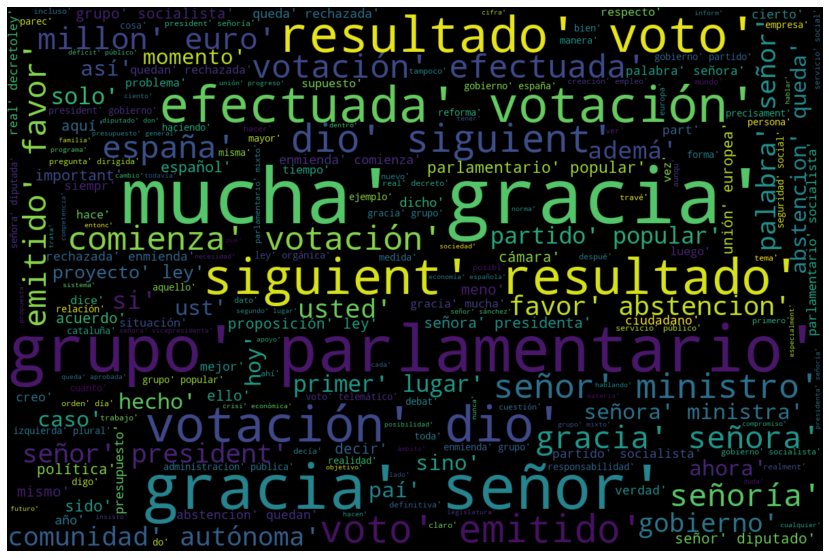

In [120]:
pp=base[base['party'] == 'PP']
pp_words = " ".join (token for token in pp.tokens)
wordcloud2 = WordCloud(width=1200, height=800).generate(pp_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

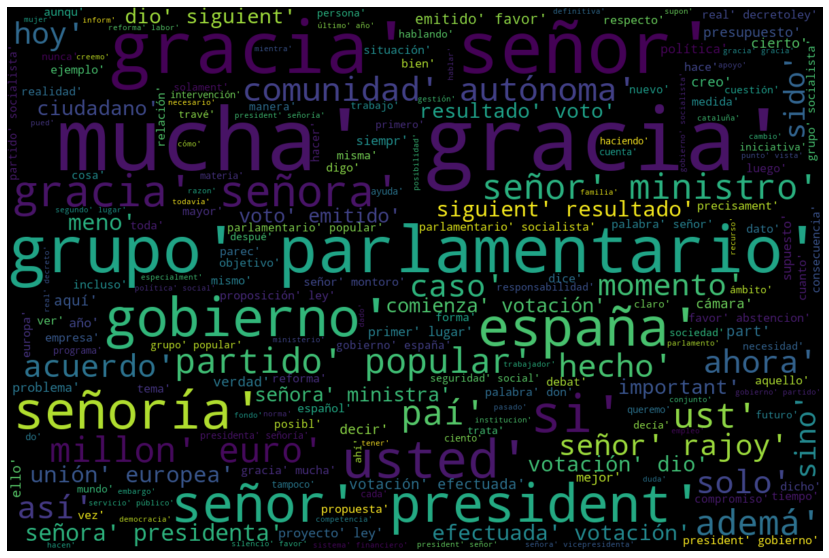

In [118]:
psoe=base[base['party'] == 'PSOE']
psoe_words = " ".join (token for token in psoe.tokens)
wordcloud2 = WordCloud(width=1200, height=800).generate(psoe_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()